In [2]:
import sys
import os
import json

import pyspark
import datetime
from pyspark.sql import *
import pyspark.sql.functions as F
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
tones_df = spark.read.parquet("tone_mean_count_5themes.parquet")

In [5]:
import pandas 

/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
import matplotlib.pyplot as plt

In [7]:
tones = tones_df.toPandas()

In [8]:
tones.head()

,day,month,year,tone_mean
0,19.0,8.0,2017.0,-1.830114
1,7.0,7.0,2017.0,-2.239015
2,26.0,8.0,2016.0,-2.204316
3,24.0,8.0,2016.0,-2.372774
4,24.0,12.0,2016.0,-1.952390


In [9]:
tones['datetime'] = pandas.to_datetime(tones[['year','month','day']])

In [10]:
tones = tones.sort_values(by='datetime') 

In [11]:
tones.head()

,day,month,year,tone_mean,datetime
902,18.0,2.0,2015.0,-2.306939,2015-02-18
508,19.0,2.0,2015.0,-1.986621,2015-02-19
667,20.0,2.0,2015.0,-2.275454,2015-02-20
620,21.0,2.0,2015.0,-2.116303,2015-02-21
73,22.0,2.0,2015.0,-1.824022,2015-02-22


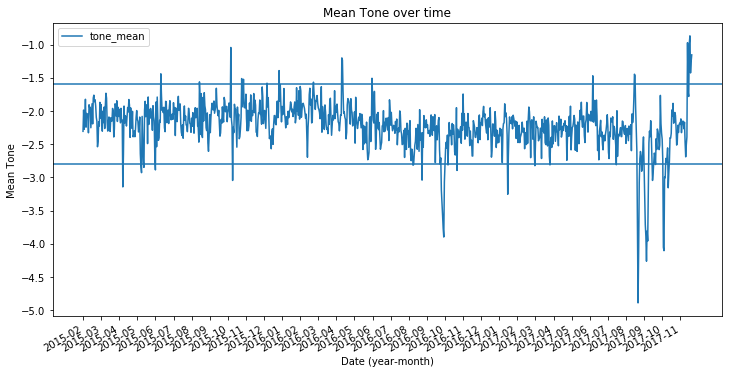

In [12]:
tones.plot('datetime','tone_mean',figsize=(12,6))
# display a label every month
ticks = tones.datetime.values[0::30]
labels = [str(t).split('-')[0] + "-" + str(t).split('-')[1] for t in ticks]
plt.xticks(ticks, labels)
plt.xlabel("Date (year-month)")
plt.ylabel("Mean Tone")
plt.title("Mean Tone over time")
plt.axhline(y=-1.6)
plt.axhline(y=-2.8)
plt.show()

In [13]:
tones[tones['tone_mean']>-1.6]

,day,month,year,tone_mean,datetime
210,27.0,6.0,2015.0,-1.440684,2015-06-27
206,30.0,8.0,2015.0,-1.562227,2015-08-30
897,21.0,10.0,2015.0,-1.043949,2015-10-21
389,8.0,11.0,2015.0,-1.511957,2015-11-08
597,11.0,11.0,2015.0,-1.523233,2015-11-11
887,20.0,12.0,2015.0,-1.581480,2015-12-20
240,9.0,1.0,2016.0,-1.392091,2016-01-09
363,6.0,3.0,2016.0,-1.566799,2016-03-06
534,22.0,4.0,2016.0,-1.200882,2016-04-22
94,23.0,4.0,2016.0,-1.234557,2016-04-23


In [14]:
tones[tones['tone_mean']<-2.8]

,day,month,year,tone_mean,datetime
551,25.0,4.0,2015.0,-3.144064,2015-04-25
339,25.0,5.0,2015.0,-2.832027,2015-05-25
591,26.0,5.0,2015.0,-2.929801,2015-05-26
318,30.0,5.0,2015.0,-2.849744,2015-05-30
960,18.0,6.0,2015.0,-2.887916,2015-06-18
23,24.0,10.0,2015.0,-3.046693,2015-10-24
499,18.0,8.0,2016.0,-2.817277,2016-08-18
737,19.0,8.0,2016.0,-2.807783,2016-08-19
726,2.0,9.0,2016.0,-3.041629,2016-09-02
211,2.0,10.0,2016.0,-2.803298,2016-10-02
